In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('projectData/DATA/stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
1,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
2,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
3,Female,75.0,0,1,Yes,Self-employed,Rural,243.53,27.0,never smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


In [4]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  object 
 1   age                29065 non-null  float64
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  object 
 5   work_type          29065 non-null  object 
 6   Residence_type     29065 non-null  object 
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  object 
 10  stroke             29065 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.4+ MB


In [6]:
df.dtypes.sort_values().to_frame('feature_type').groupby(by='feature_type').size().to_frame('count').reset_index()

,feature_type,count
0,int64,3
1,float64,3
2,object,5


In [7]:
df.stroke.value_counts()

0    28517
1      548
Name: stroke, dtype: int64

In [8]:
df['stroke'].value_counts()

0    28517
1      548
Name: stroke, dtype: int64

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

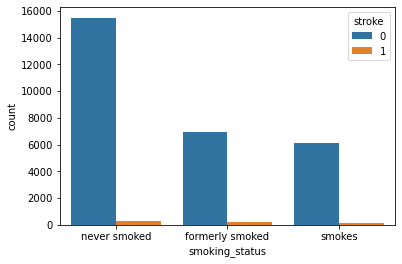

In [9]:
sns.countplot(x='smoking_status',hue='stroke',data=df)

<AxesSubplot:xlabel='ever_married', ylabel='count'>

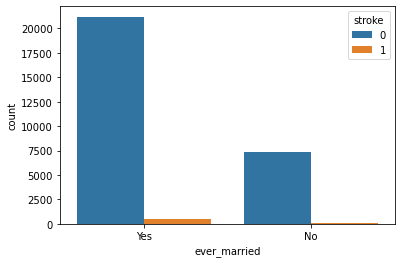

In [10]:
sns.countplot('ever_married', data=df,hue='stroke')

<AxesSubplot:xlabel='work_type', ylabel='count'>

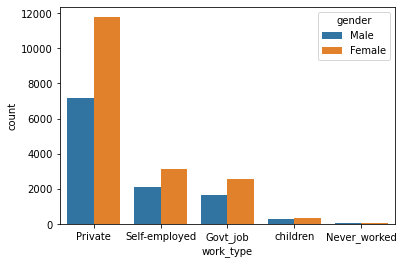

In [11]:
sns.countplot('work_type', data=df,hue='gender')

<AxesSubplot:xlabel='age', ylabel='count'>

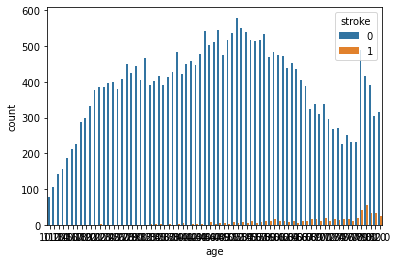

In [12]:
sns.countplot('age', data=df,hue='stroke')

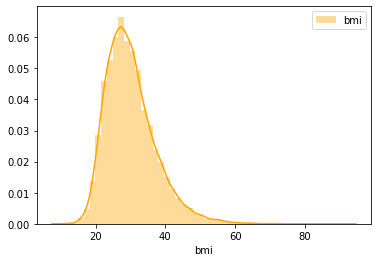

In [13]:
sns.distplot(df.bmi ,color='orange',kde=True, label='bmi')
plt.legend()
plt.show()

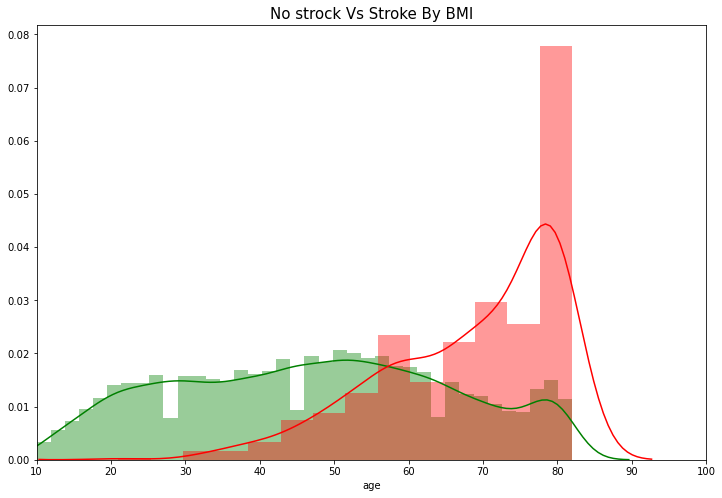

In [14]:
plt.figure(figsize=(12,8))

sns.distplot(df[df.stroke == 0]["age"], color="green")
sns.distplot(df[df.stroke != 0]["age"], color="red")

plt.title("No strock Vs Stroke By BMI", fontsize=15)
plt.xlim([10,100])
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample 
lb = LabelEncoder()

In [16]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col] = lb.fit_transform(df[col])

In [17]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,58.0,1,0,1,2,1,87.96,39.2,1,0
1,0,70.0,0,0,1,2,0,69.04,35.9,0,0
2,0,52.0,0,0,1,2,1,77.59,17.7,0,0
3,0,75.0,0,1,1,3,0,243.53,27.0,1,0
4,0,32.0,0,0,1,2,0,77.67,32.3,2,0


In [18]:
df.stroke.value_counts()

0    28517
1      548
Name: stroke, dtype: int64

In [19]:
df_major = df[df.stroke==0]
df_minor = df[df.stroke==1]

In [20]:
df_minor_upsampled = resample(df_minor,replace=True,n_samples = 28517, random_state=101 )

In [21]:
df_minor_upsampled = pd.concat([df_minor_upsampled,df_major])

In [22]:
df_minor_upsampled.stroke.value_counts()

1    28517
0    28517
Name: stroke, dtype: int64

In [23]:
X = df_minor_upsampled.drop('stroke',axis=1)
y = df_minor_upsampled.stroke

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [38]:
scaled = StandardScaler()

In [39]:
X_train = scaled.fit_transform(X_train)
X_test = scaled.transform(X_test)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [41]:
lg = LogisticRegression()

In [45]:
lg.fit(X_train,y_train)

LogisticRegression()

In [46]:
predictions = lg.predict(X_test)

In [48]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      7170
           1       0.74      0.79      0.77      7089

    accuracy                           0.76     14259
   macro avg       0.76      0.76      0.76     14259
weighted avg       0.76      0.76      0.76     14259

0.7612735815975875


In [58]:
knn = KNeighborsClassifier()

In [68]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7170
           1       0.98      1.00      0.99      7089

    accuracy                           0.99     14259
   macro avg       0.99      0.99      0.99     14259
weighted avg       0.99      0.99      0.99     14259

0.9889894101970685


In [60]:
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      7170
           1       0.98      1.00      0.99      7089

    accuracy                           0.99     14259
   macro avg       0.99      0.99      0.99     14259
weighted avg       0.99      0.99      0.99     14259

0.9889894101970685


In [70]:
print(confusion_matrix(y_test,y_pred))

[[7013  157]
 [   0 7089]]


In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier()

In [63]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
pred = rfc.predict(X_test)

In [66]:
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7170
           1       1.00      1.00      1.00      7089

    accuracy                           1.00     14259
   macro avg       1.00      1.00      1.00     14259
weighted avg       1.00      1.00      1.00     14259

0.9988779016761343


In [69]:
print(confusion_matrix(y_test,pred))

[[7154   16]
 [   0 7089]]
